# DSDJ Technical Workshop | Feature Engineering Part 2 

## Working with Text & Dates
***

**What we'll be doing:**

- Tokenization, stemming, and normalizing of text
- TFIDF Vectorization
- Feature engineering (length of SMS text)
- Training classification model using Random Forest
- Evaluating and Compare Performance of the trained classification model

In [2]:
__author__ = "Akash Tutorial"
__copyright__ = "Copyright 2019, Akash Tutorial"
__email__ = "akash97715@gmail.com"

# Import the required libraries 
import scipy as sp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load and Examine Data
***

**Load spam dataset**

In [3]:
# Load CSV data
spam_df = pd.read_csv('./spam.csv', encoding='latin-1')
print(spam_df.shape)
spam_df.head()


(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Only get the label and text feature
spam_df = spam_df[['v1','v2']]
spam_df.columns = ['label','text']

# Convert spam/ham label into binary output
class_labels = ["ham",'spam']
spam_df['label'] = spam_df['label'].apply(class_labels.index)

spam_df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam_df['text']

'U dun say so early hor... U c already then say...'

**Spam/Ham Ratio**

In [7]:
# Check class distrubtion of target - About 14% spam and 86% ham
spam_df.label.value_counts() 

0    4825
1     747
Name: label, dtype: int64

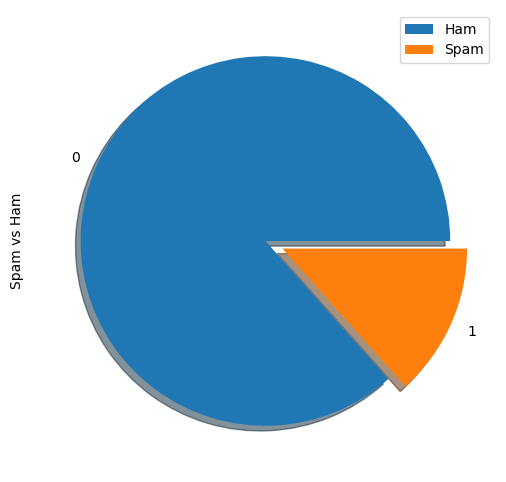

In [8]:
# Plot the class distribution
spam_df["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

# Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(spam_df,spam_df['label'],test_size=0.20, random_state=123, stratify=spam_df['label'])

# Pre-Processing Pipeline
***
- Tokenization
- Lower casing
- Stopword removal
- Stemming
- Transformmation (TFIDFVectorizer)

## 1. Tokenization - Representing Text

**Example Text**

In [10]:
# Examine the text reviews
text1 = x_train['text'][100]
text1

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

**Example - Tokenize Text**

In [9]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text1)
print(tokens)

['Okay', 'name', 'ur', 'price', 'as', 'long', 'as', 'its', 'legal', '!', 'Wen', 'can', 'I', 'pick', 'them', 'up', '?', 'Y', 'u', 'ave', 'x', 'ams', 'xx']


## 2. Text Pre-Processing Pipeline

Our text pre-processing pipeline will include (but not limited to):
- tokenization
- lowercasing
- stop word removal
- stemming

**Load Additional Text Libraries**

In [11]:
# Load Stemming Library (PorterStemmer)
from nltk.stem.porter import PorterStemmer

# Load TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

**1. Stemming Words**

In [12]:
# Apply Stemming
porter = PorterStemmer()
x_train['text'] = x_train['text'].apply(porter.stem)

**2. Stopword Removal & Lowercasing**

In [13]:
# Initialize TFIDFVectorizer with stop word removal and lowercasing of text
cv = TfidfVectorizer(stop_words='english', lowercase=True)
#cv = CountVectorizer(stop_words='english', lowercase=True)

**3. Apply TFIDF**

In [14]:
x_train_CV = cv.fit_transform(x_train['text'])

In [15]:
pd.DataFrame(x_train_CV.todense()).head()

,0,1,2,3,4,5,6,7,8,9,...,7561,7562,7563,7564,7565,7566,7567,7568,7569,7570
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.362867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Text Pre-Process Pipeline Function

In [17]:
# A function that cleans and performs a TFIDF transformation to our text data
tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
def tfidf_pipeline(txt, flag):
    if flag == "train":
        txt = txt.apply(porter.stem) # Apply Stemming on train set
        x = tfidf.fit_transform(txt) # Apply Vectorizer, Stopword Removal, & Lowercasing on train set
    else:
        txt = txt.apply(porter.stem) # Apply Stemming on test set
        x = tfidf.transform(txt) # Apply Vectorizer, Stopword Removal, & Lowercasing on test set
    return x 

In [18]:
x_train_TFIDF = tfidf_pipeline(x_train['text'], flag="train")
x_test_TFIDF = tfidf_pipeline(x_test['text'], flag="test")

In [21]:
x_test_TFIDF.getrow

<bound method csr_matrix.getrow of <1115x7559 sparse matrix of type '<class 'numpy.float64'>'
	with 7686 stored elements in Compressed Sparse Row format>>

### Original VS Pre-Processed Training Set

**NOTICE:**
- Our original training set had **ONLY 1** feature to work with
- After pre-processing, we now have **7223** features to work with in our training set

In [22]:
original = x_train.shape
preprocessed = x_train_TFIDF.shape

In [29]:
preprocessed

(4457, 7559)

**Print the shape of our  original vs preprocessed train set**

In [30]:
print ("Our original training set shape: " + str(original))
print ("Our preprocessed training set shape: " + str(preprocessed))

Our original training set shape: (4457, 2)
Our preprocessed training set shape: (4457, 7559)


## 3. Modeling

In [31]:
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

**Initialize and Fit Logistic Regression Model**

In [33]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_model = rf.fit(x_train_TFIDF,y_train)

## 4. Cross Validiation

**Apply 10-Fold Cross Validation**

In [34]:
# Apply 10-Fold Cross Validation and Examine Accuracy Score
rf_result = cross_val_score(rf_model, x_train_TFIDF, y_train, cv=5, scoring='accuracy')
rf_result.mean()

0.9715075518513485

## 5. Evaluate on Test Set
**Evaluate Test Set**

In [35]:
y_pred = rf_model.predict(x_test_TFIDF)
precision_1, recall_1, fscore_1, support_1 = score(y_test, y_pred, pos_label=1, average ='binary')
print('Classification Report (With Only Text) | Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_1,3),round(recall_1,3),round(fscore_1,3),round((y_pred==y_test).sum()/len(y_test),3)))

Classification Report (With Only Text) | Precision : 1.0 / Recall : 0.872 / fscore : 0.932 / Accuracy: 0.983


**Confusion Matrix**

In [36]:
confusion_matrix(y_test, y_pred)

array([[966,   0],
       [ 19, 130]], dtype=int64)

In [38]:
y_test.value_counts()

0    966
1    149
Name: label, dtype: int64

# Feature Engineering
***

Let's build up some intuition about our SMS text data and see if we can **improve our model's performance**

Let's see how the addition of a **'length'** feature will affect our model's performance. 

In [40]:
# Import additional libraries
from scipy.sparse import csr_matrix, hstack

**Examine New Dataset with 'length' feature**

In [41]:
# Add a column for the lenght of the SMS text
spam_df['length'] = spam_df['text'].str.len()
spam_df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Does text length have any association with SMS Text Messages (Spam or Ham)?**

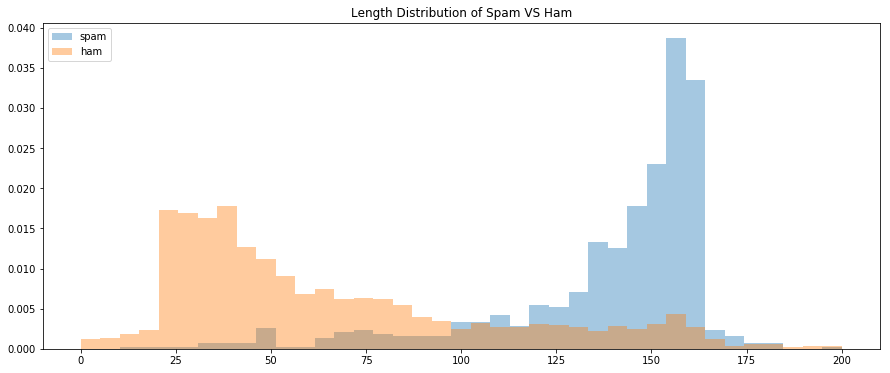

In [42]:
# Plot the distribution of text length (spam vs ham)
plt.figure(figsize=(15,6))
plt.hist(spam_df[spam_df['label']==1]['length'],bins = np.linspace(0,200,num=40),alpha=0.4,label='spam',normed=True)
plt.hist(spam_df[spam_df['label']==0]['length'],bins = np.linspace(0,200,num=40),alpha =0.4,label ='ham', normed=True)
plt.legend(loc ='upper left')
plt.title('Length Distribution of Spam VS Ham')
plt.show()

**Train and Test Split of the new dataframe**

In [43]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(spam_df,spam_df['label'],test_size=0.20, random_state=123, stratify=spam_df['label'])

**Transform and Merge into one matrix**

In [44]:
# Get TFIDF Transformed Matrix on 'text'
x_train_TFIDF = tfidf_pipeline(x_train2['text'], flag="train")
x_test_TFIDF = tfidf_pipeline(x_test2['text'], flag="test")

# Convert length column into csr_matrix
x_train_len = csr_matrix(x_train2[['length']])
x_test_len =  csr_matrix(x_test2[['length']])

# Merge matrices together
x_train_merge = hstack((x_train_TFIDF, x_train_len)).tocsr()
x_test_merge = hstack((x_test_TFIDF, x_test_len)).tocsr()

**Fit our Random Forest model to the new matrix**

In [47]:
rf_model2 = rf.fit(x_train_merge,y_train2)

**Apply 10-Fold Cross Validation to our new matrix**

In [48]:
# Apply 10-Fold Cross Validation and Examine Accuracy Score
rf_result2 = cross_val_score(rf_model2, x_train_merge, y_train2, cv=10, scoring='accuracy')
rf_result2.mean()

0.9782334543945872

**Save our scores**

In [49]:
y_pred2 = rf_model2.predict(x_test_merge)
precision_2, recall_2, fscore_2, support_2 = score(y_test2, y_pred2, pos_label=1, average ='binary')

## Classification Report Comparison
***

Performance with the additional **Length** feature:
- Increased Recall Score by 4%
- Increased Accuracy Score by .06%

In [50]:
print('==========Classification Report (With Text)=========== \n Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_1,3),round(recall_1,3),round(fscore_1,3),round((y_pred==y_test).sum()/len(y_test),3)))
print('\n ==========Classification Report (With Text & Length)=========== \n Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision_2,3),round(recall_2,3),round(fscore_2,3),round((y_pred2==y_test2).sum()/len(y_test2),3)))

==========Classification Report (With Text)=========== 
 Precision : 1.0 / Recall : 0.886 / fscore : 0.94 / Accuracy: 0.985

 ==========Classification Report (With Text & Length)=========== 
 Precision : 1.0 / Recall : 0.886 / fscore : 0.94 / Accuracy: 0.985


### Confusion Matrix Comparison
***

Performance with the additional **Length** feature:
- Made 6 less false negative errors 

In [51]:
print('============Confusion Matrix (With Text)============')
print(confusion_matrix(y_test, y_pred))
print('============Confusion Matrix (With Text & Length)============')
print(confusion_matrix(y_test2, y_pred2))

============Confusion Matrix (With Text)============
[[966   0]
 [ 17 132]]
============Confusion Matrix (With Text & Length)============
[[966   0]
 [ 17 132]]


## Examine our misclassified SMS Text
***

Here are the **False Negative Errors** that our model made. 

It recognized these texts as "Not Spam", but they are actually "Spam".

In [52]:
# Examine our misclassified SMS text 
missclassified = np.nonzero(y_pred2!=y_test2)[0]
ind_miss = y_test2.index[missclassified]
spam_df.iloc[ind_miss,:]

,label,text,length
3740,1,2/2 146tf150p,13
3989,1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,137
2351,1,Download as many ringtones as u like no restri...,120
1639,1,FreeMsg:Feelin kinda lnly hope u like 2 keep m...,160
2963,1,"Do you ever notice that when you're driving, a...",135
263,1,Hey I am really horny want to chat or see me n...,121
2943,1,We currently have a message awaiting your coll...,100
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
1273,1,network operator. The service is free. For T &...,66
1459,1,Bought one ringtone and now getting texts cost...,81


# Feature Engineering with Dates
***

In [ ]:
alexa_df = pd.read_csv('./amazon_alexa.tsv', sep = '\t')
alexa_df = alexa_df[['date']]
alexa_df.head()

## Extracting Date, Month, Year, and Quarter

In [ ]:
# Convert the column into a date time object
alexa_df['date'] = pd.to_datetime(alexa_df['date'])

# Create a new 'year' feature by extracting the year value from date
alexa_df['year'] = alexa_df.date.dt.year

# Create a new 'month' feature by extracting the month value from date
alexa_df['month'] = alexa_df.date.dt.month

# Create a new 'day' feature by extracting the day value from date
alexa_df['day'] = alexa_df.date.dt.day

# Create a new 'Qtr' feature by extracting the monthly quarter from date
alexa_df['Qtr'] = alexa_df.date.dt.quarter

In [ ]:
# Examine new data frame
alexa_df.head()

## Extracting Holidays

In [ ]:
# Create holiday dates
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays()

# Examine holiday dates
cal.holidays()

In [ ]:
# Create New Column 'Holiday'
alexa_df['Holiday'] = alexa_df['date'].isin(holidays)
alexa_df.tail()

## Calculating Days Before Two Given Dates

In [ ]:
def calculate_xmas(date):
    xmas = pd.to_datetime(pd.Series('2018-12-25'))
    diff = xmas - date
    return diff

alexa_df['days_before_xmas'] = alexa_df.date.apply(calculate_xmas)

In [ ]:
alexa_df.head()

## Activity
***

**Try it out yourself:**

1. Download the Amazon Alexa Dataset: https://www.kaggle.com/sid321axn/amazon-alexa-reviews
2. Preprocess the data using the techniques we've covered above
    - Preprocess the dates accordingly
    - Remove stop words, remove punctuations, lowercase, and apply stemming to the text
    - Perform TFIDFVectorizer on the text feature
    - Perform other feature engineering techniques
    - Apply a Random Forest Model to predict the review scores
3. Examine your model's performance.
4. Try to develop MORE features from your dataset. Be creative and think of novel features that may impact your target feature (review score)

**Compare your results and see if there are any significant improvements!**